![ai](https://www.emineo-education.fr/wp-content/uploads/2022/11/supdevinci-nantes.png)


<h4 style="text-align: left; color:#20a08d; font-size: 35px"><span><strong> Assurez la modération des contenus multimédia avec AWS</strong></span></h4>

<h4 style="text-align: left; color:#20a08d; font-size: 25px"><span><strong> Introduction
</strong></span></h4>

Le saviez-vous ? Les réseaux sociaux du groupe Meta Facebook et Instagram recueillent environ 2 milliards d'images de leurs utilisateurs tous les jours. Imaginez toute l'infrastructure informatique nécessaire pour traiter toutes ces données

![](https://github.com/archiducarmel/SupDeVinci_Developpement/releases/download/ia_ml_aws/fb.gif)

Afin de fournir des services intuitifs à leurs utilisateurs, plusieurs traitements sont réalisés sur chacune de ces images.

![](https://github.com/archiducarmel/SupDeVinci_Developpement/releases/download/ia_ml_aws/fb2.png)

Nous allons utiliser dans ce TP les services AWS pour réaliser quelques-uns de ces fonctionnalités. La finalité ultime consiste à développer une fonction de traitement qui recueille une image ou une vidéo en entrée, la modère afin de vérifier si son contenu est publiable, produit des sous-titres (dans le cas des vidéos) et fournit des hashtags issus de mots les plus représentatifs du contenu.

<h4 style="text-align: left; color:#20a08d; font-size: 25px"><span><strong> Workflow de traitement
</strong></span></h4>

Voici ci-dessous le procédé de traitement qui sera appliqué de bout-en-bout sur toute image présentée en entrée de la fonction de traitement.

![](https://github.com/archiducarmel/SupDeVinci_Developpement/releases/download/ia_ml_aws/aws_socialmedia.drawio.png)

<h4 style="text-align: left; color:#20a08d; font-size: 25px"><span><strong> Détection du type de fichier
</strong></span></h4>

La fonction `check_filetype` ci-dessous permet de déterminer le type (image ou vidéo) d'un fichier fourni en entrée.

In [2]:
import os

import os

def check_filetype(filename):
    """
    Détermine le type de fichier en fonction de son extension.

    Cette fonction prend un nom de fichier en entrée, extrait son extension et détermine
    le type de fichier (par exemple, image, vidéo). Si l'extension du fichier est reconnue comme un format
    d'image courant (jpg, png, tiff, svg) ou un format de vidéo courant (mp4, avi, mkv), elle attribue
    le type correspondant. Sinon, le type de fichier est défini sur None.

    Paramètres :
    - filename (str) : Le chemin vers le fichier incluant le nom de fichier.

    Retourne :
    - str ou None : Le type de fichier déterminé ('image', 'vidéo') ou None si le type de fichier
      n'est pas reconnu.

    Exemple :
    >>> check_filetype("/chemin/vers/image.jpg")
    'image'
    >>> check_filetype("/chemin/vers/video.mp4")
    'vidéo'
    >>> check_filetype("/chemin/vers/fichierinconnu.xyz")
    None
    """

    # Extrait le nom de base du fichier à partir du chemin de fichier fourni.
    file_basename = os.path.basename(filename)

    # Sépare le nom de base sur le point et prend la dernière partie comme extension.
    extension = file_basename.split(".")[-1]

    # Détermine le type de fichier en fonction de l'extension.
    if extension in ["jpg", "png", "tiff", "svg"]:
        filetype = "image"
    elif extension in ["mp4", "avi", "mkv"]:
        filetype = "vidéo"
    else:
        filetype = None

    # Enregistre le type de fichier détecté.
    print(f"[INFO] : Le fichier {file_basename} est de type : {filetype}")
    
    return filetype


<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Appelez la fonction <code style="text-align: left; font-size: 16px; color:#131fcf">check_filetype</code> sur la vidéo de test et l'image de test afin d'en détecter le type</span></p>

In [3]:
TEST_VIDEO_FILE = "./assets/tuto_maquillage.mp4"
TEST_IMAGE_FILE = "./assets/selfie_with_johnny-depp.png"


In [ ]:
# Code fonctionnel
# Fichiers de test
TEST_VIDEO_FILE = "./assets/tuto_maquillage.mp4"
TEST_IMAGE_FILE = "./assets/selfie_with_johnny-depp.png"

# Test de la fonction avec le fichier vidéo
print("Test avec le fichier vidéo :")
filetype_video = check_filetype(TEST_VIDEO_FILE)

# Test de la fonction avec le fichier image
print("\nTest avec le fichier image :")
filetype_image = check_filetype(TEST_IMAGE_FILE)

Test avec le fichier vidéo :
[INFO] : Le fichier tuto_maquillage.mp4 est de type : vidéo

Test avec le fichier image :
[INFO] : Le fichier selfie_with_johnny-depp.png est de type : image


<h4 style="text-align: left; color:#20a08d; font-size: 25px"><span><strong> Extraction d'une image de la vidéo
</strong></span></h4>

La fonction `extract_frame_video` ci-dessous permet d'extraire une image sous forme de tableau de pixels d'une vidéo à partir de la position de l'image dans la vidéo

In [4]:
import cv2

def extract_frame_video(video_path, frame_id):
    """
    Extrait une image spécifique d'une vidéo.

    Cette fonction utilise OpenCV pour ouvrir une vidéo à partir du chemin spécifié et extrait une image
    particulière en fonction de son ID. L'ID de l'image correspond à l'ordre de l'image dans la vidéo, en commençant
    par 0 pour la première image. Si l'extraction réussit, l'image est retournée sous forme d'un tableau Numpy.

    Paramètres :
    - video_path (str) : Le chemin vers le fichier vidéo d'où extraire l'image.
    - frame_id (int) : L'identifiant (ID) de l'image à extraire.

    Retourne :
    - ndarray ou None : L'image extraite (un tableau Numpy) si l'extraction est réussie,
      sinon `None`.

    Exemple :
    >>> image = extract_frame_video("/chemin/vers/video.mp4", 150)
    >>> type(image)
    <class 'numpy.ndarray'>
    """

    # Ouvre la vidéo à partir du chemin fourni.
    video = cv2.VideoCapture(video_path)

    # Positionne le lecteur vidéo sur l'image spécifiée par frame_id.
    video.set(cv2.CAP_PROP_POS_FRAMES, frame_id)

    # Lit l'image actuelle.
    ret, image = video.read()

    # Si la lecture réussit (ret est True), retourne l'image.
    # Sinon, retourne None.
    return image if ret else None

<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Appelez la fonction <code style="text-align: left; font-size: 16px; color:#131fcf">extract_frame_video</code> sur la vidéo de test afin d'en extraire la première image de la vidéo, puis affichez cette image avec <code style="text-align: left; font-size: 16px; color:#131fcf">matplotlib</code></span></p>

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2

TEST_VIDEO_FILE = "./assets/tuto_jeux-video.mp4"

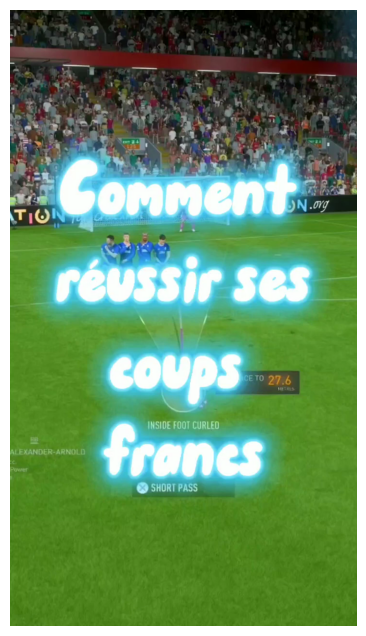

In [ ]:
# Code fonctionnel
# Import des bibliothèques nécessaires
%matplotlib inline 
from matplotlib import pyplot as plt
import cv2

TEST_VIDEO_FILE = "./assets/tuto_jeux-video.mp4"

# Extraction de la première image (frame_id = 0)
frame = extract_frame_video(TEST_VIDEO_FILE, 0)

# Affichage de l'image avec matplotlib
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Appelez la fonction <code style="text-align: left; font-size: 16px; color:#131fcf">extract_frame_video</code> sur la vidéo de test afin d'en extraire la quatre vingt dix-neuvième image de la vidéo, puis affichez cette image avec <code style="text-align: left; font-size: 16px; color:#131fcf">matplotlib</code></span></p>

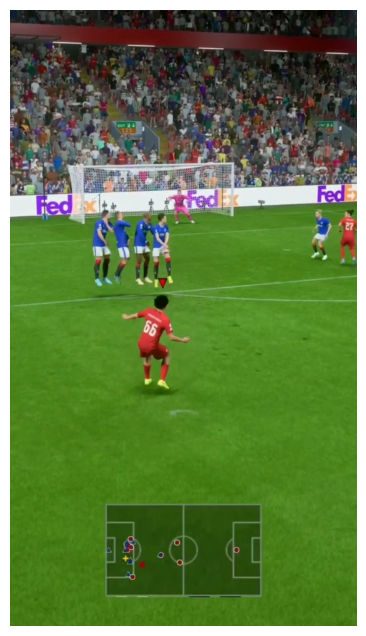

In [ ]:
# Code fonctionnel
# Ouvrir la vidéo
cap = cv2.VideoCapture(TEST_VIDEO_FILE)

# Aller à la 99ème frame
for i in range(99):
    ret, frame = cap.read()

# Lire la frame
ret, frame = cap.read()

# Convertir BGR en RGB pour l'affichage avec matplotlib
if ret:
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 8))
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.show()

# Libérer les ressources
cap.release()

<h4 style="text-align: left; color:#20a08d; font-size: 25px"><span><strong> Modération d'une image
</strong></span></h4>

La fonction `get_aws_session` ci-dessous permet de se connecter à une session AWS en utilisant les clés d'accès et clés secrètes.

In [8]:
#!pip install boto3 python-dotenv 
#!pip install nltk

In [21]:
import os, boto3
from dotenv import load_dotenv

def get_aws_session():
    """
    Crée et retourne une session AWS.

    Cette fonction charge les variables d'environnement depuis un fichier .env situé dans le répertoire
    courant ou les parents de celui-ci, récupère les clés d'accès AWS (`ACCESS_KEY` et `SECRET_KEY`),
    et initialise une session AWS avec ces identifiants ainsi qu'avec une région spécifiée (dans cet exemple,
    'us-east-1'). Elle est particulièrement utile pour configurer une session AWS de manière sécurisée sans
    hardcoder les clés d'accès dans le code.

    Retourne :
    - Session : Un objet session de boto3 configuré avec les clés d'accès et la région AWS.

    Exemple d'utilisation :
    >>> session_aws = get_aws_session()
    >>> type(session_aws)
    <class 'boto3.session.Session'>
    """

    # Charge les variables d'environnement depuis .env.
    load_dotenv()

    # Crée une session AWS avec les clés d'accès et la région définies dans les variables d'environnement.
    aws_session = boto3.Session(
        aws_access_key_id=os.getenv("ACCESS_KEY"),        # Récupère l'ID de clé d'accès depuis les variables d'environnement.
        aws_secret_access_key=os.getenv("SECRET_KEY"),    # Récupère la clé d'accès secrète depuis les variables d'environnement.
        region_name="eu-west-3"                           # Spécifie la région AWS à utiliser.
    )
    
    # Retourne l'objet session créé.
    return aws_session


Passons maintenant au développement de la fonction `moderate_image`. Cette fonction prendra en entrée une image et renverra la liste des thèmes choquants présents dans l'image, s'il y'en a. 

<p style="text-align: left; font-size: 16px; color:#7a0f43"><span>❓ Quelle service AWS serait le plus indiqué pour réaliser ce traitement ?</span></p>

In [ ]:
"Pour détecter des thèmes choquants dans une image, le service AWS le plus approprié serait AWS Rekognition avec sa fonctionnalité de modération de contenu (detect_moderation_labels). C'est un service qui est spécialement conçu pour détecter automatiquement du contenu inapproprié ou choquant dans les images."

<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Ecrivez le code dans la fonction  <strong>moderate_image</strong> permettant d'analyser une image et détecter les sujets de modération </span></p>

In [10]:
def moderate_image(image_path, aws_service):
    """
    Détecte du contenu nécessitant une modération dans une image en utilisant un service AWS spécifié.

    Cette fonction ouvre une image depuis un chemin donné, puis utilise le service AWS (comme Amazon Rekognition)
    pour détecter les contenus potentiellement inappropriés ou sensibles (comme la nudité, la violence, etc.).
    Elle collecte et retourne une liste des étiquettes de modération identifiées pour cette image.

    Paramètres :
    - image_path (str) : Le chemin vers l'image à analyser.
    - aws_service (object) : Un objet de service AWS configuré, capable de réaliser des opérations de détection
      de contenu nécessitant une modération (par exemple, un client Amazon Rekognition).

    Retourne :
    - list[str] : Une liste des noms des étiquettes de modération détectées pour l'image.

    Exemple d'utilisation :
    >>> aws_rekognition_client = boto3.client('rekognition', region_name='us-east-1')
    >>> moderate_image("/chemin/vers/image.jpg", aws_rekognition_client)
    ['Nudity', 'Explicit Violence']
    """


In [ ]:
# Code fonctionnel
def moderate_image(image_path, aws_service):
    """
    Détecte du contenu nécessitant une modération dans une image en utilisant un service AWS spécifié.

    Cette fonction ouvre une image depuis un chemin donné et utilise le service AWS Rekognition
    pour détecter les contenus potentiellement inappropriés ou sensibles.

    Paramètres:
    - image_path (str): Le chemin vers l'image à analyser
    - aws_service (object): Un client AWS Rekognition configuré

    Retourne:
    - list[str]: Une liste des étiquettes de modération détectées
    """
    try:
        # Ouvrir et lire l'image
        with open(image_path, 'rb') as image:
            response = aws_service.detect_moderation_labels(
                Image={
                    'Bytes': image.read()
                },
                MinConfidence=50  # Seuil de confiance minimum de 50%
            )
        
        # Extraire et retourner les noms des étiquettes de modération
        moderation_labels = [label['Name'] for label in response['ModerationLabels']]
        return moderation_labels

    except Exception as e:
        print(f"Erreur lors de l'analyse de l'image : {str(e)}")
        return []

<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Ecrivez le code permettant de tester la fonction  <strong>moderate_image</strong>. Pour ce faire : <ul style="text-align: left; font-size: 16px; color:#131fcf">
    <li>Instancier une session AWS avec vos clés</li>
    <li>Instancier le service AWS approprié pour ce traitement </li>
    <li>Appelez la fonction <code style="text-align: left; font-size: 16px; color:#131fcf">moderate_image</code> avec ce service comme argument afin de recueillir la liste potentielle des thèmes choquants</li>
    </ul> </span></p>

In [11]:
TEST_IMAGE_FILE_1 = "./assets/haine.png"
TEST_IMAGE_FILE_2 = "./assets/vulgaire.png"
TEST_IMAGE_FILE_3 = "./assets/violence1.png"
TEST_IMAGE_FILE_4 = "./assets/no-violence1.png"


In [ ]:
# Code fonctionnel
# Instancier une session AWS avec les clés
aws_session = get_aws_session()

# Instancier le service AWS Rekognition
rekognition = aws_session.client('rekognition', region_name='eu-west-3')

# Tester la fonction moderate_image sur chaque image de test
test_files = [
   TEST_IMAGE_FILE_1,
   TEST_IMAGE_FILE_2, 
   TEST_IMAGE_FILE_3,
   TEST_IMAGE_FILE_4
]

# Analyser chaque image et afficher les résultats
for image_file in test_files:
   print(f"\nAnalyse de l'image : {image_file}")
   moderation_labels = moderate_image(image_file, rekognition)
   
   if moderation_labels:
       print("Contenus sensibles détectés :")
       for label in moderation_labels:
           print(f"- {label}")
   else:
       print("Aucun contenu sensible détecté")


Analyse de l'image : ./assets/haine.png
Contenus sensibles détectés :
- Nazi Party
- Hate Symbols

Analyse de l'image : ./assets/vulgaire.png
Contenus sensibles détectés :
- Middle Finger
- Rude Gestures

Analyse de l'image : ./assets/violence1.png
Contenus sensibles détectés :
- Weapon Violence
- Graphic Violence
- Violence
- Weapons

Analyse de l'image : ./assets/no-violence1.png
Aucun contenu sensible détecté


<h4 style="text-align: left; color:#20a08d; font-size: 25px"><span><strong> Production de sous-titres
</strong></span></h4>

La production de sous-titres à partir d'une vidéo s'appuiera sur la technologie speech-to-text d'AWS.

<div class="alert alert-info">
  <strong>BUCKET S3</strong><br><br> Au préalable, assurez-vous d'avoir créé un bucket S3 puisque la transcription speech-to-text nécessite que le fichier transcrit soit déposé dans un bucket S3
</div>

<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Ecrivez le code permettant d'instancier un client S3 puis de créer un bucket </span></p>

In [ ]:
# Code fonctionnel
import boto3
from dotenv import load_dotenv
import os
import uuid

# Charger les variables d'environnement
load_dotenv()

# Créer une session AWS
session = boto3.Session(
    aws_access_key_id=os.getenv("ACCESS_KEY"),
    aws_secret_access_key=os.getenv("SECRET_KEY"),
    region_name='eu-west-3'
)

# Créer un client S3
s3 = session.client('s3')

# Créer un nom de bucket unique en ajoutant un UUID
bucket_name = f'transcription-bucket-{str(uuid.uuid4())[:8]}'

# Créer un bucket
try:
    s3.create_bucket(
        Bucket=bucket_name,
        CreateBucketConfiguration={
            'LocationConstraint': 'eu-west-3'
        }
    )
    print(f"Bucket '{bucket_name}' créé avec succès!")
except Exception as e:
    print(f"Erreur lors de la création du bucket : {str(e)}")

Bucket 'transcription-bucket-82987b22' créé avec succès!


<p style="text-align: left; font-size: 16px; color:#7a0f43"><span>❓ Quelle service AWS serait le plus indiqué pour réaliser ce traitement de transcription speech-to-text ?</span></p>

In [ ]:
"Le service AWS pour réaliser la transcription speech-to-text serait Amazon Transcribe, qui est spécialement conçu pour convertir automatiquement la parole en texte."

<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Ecrivez le code de la fonction <code style="text-align: left; font-size: 16px; color:#131fcf">get_text_from_speech</code> permettant de réaliser la transcription speech-to-text avec AWS</span></p>

<p style="text-align: left; font-size: 16px; color:#ec8f1a"><span>📚  Voice to text using AWS Transcribe : </span> <a href="https://dev.to/botreetechnologies/voice-to-text-using-aws-transcribe-with-python-1cfc">https://dev.to/botreetechnologies/voice-to-text-using-aws-transcribe-with-python-1cfc</a></p> 

In [ ]:
import os
import time
import urllib.request
import json

def get_text_from_speech(filename, aws_service, job_name, bucket_name):
    """
    Convertit de la parole en texte en utilisant AWS Transcribe.

    Cette fonction téléverse un fichier audio spécifié dans un seau S3, démarre un travail de transcription avec AWS Transcribe,
    attend que le travail soit terminé, et récupère le texte transcrit.

    Paramètres :
    - filename (str) : Chemin local vers le fichier audio à transcrire.
    - aws_service (object) : Client AWS Transcribe configuré.
    - job_name (str) : Nom unique pour le travail de transcription.
    - bucket_name (str) : Nom du seau S3 où le fichier audio est stocké.

    Retourne :
    - str : Le texte transcrit du fichier audio.

    Prérequis :
    - Le fichier audio doit déjà être téléversé dans le seau S3 spécifié.
    """


In [ ]:
# Code fonctionnel
def get_text_from_speech(filename, aws_service, job_name, bucket_name):
   """
   Convertit de la parole en texte en utilisant AWS Transcribe.

   Cette fonction téléverse un fichier audio spécifié dans un seau S3, démarre un travail de transcription 
   avec AWS Transcribe, attend que le travail soit terminé, et récupère le texte transcrit.

   Paramètres:
   - filename (str): Chemin local vers le fichier audio à transcrire
   - aws_service (object): Client AWS Transcribe configuré
   - job_name (str): Nom unique pour le travail de transcription
   - bucket_name (str): Nom du seau S3 où le fichier audio est stocké
   """
   try:
       # Démarrer le job de transcription
       response = aws_service.start_transcription_job(
           TranscriptionJobName=job_name,
           Media={'MediaFileUri': f's3://{bucket_name}/{filename}'},
           MediaFormat='mp4',  # ou le format approprié de votre fichier
           LanguageCode='fr-FR'  # ou la langue appropriée
       )

       # Attendre que le job soit terminé
       while True:
           status = aws_service.get_transcription_job(TranscriptionJobName=job_name)
           if status['TranscriptionJob']['TranscriptionJobStatus'] in ['COMPLETED', 'FAILED']:
               break
           time.sleep(5)

       # Si le job est complété, récupérer la transcription
       if status['TranscriptionJob']['TranscriptionJobStatus'] == 'COMPLETED':
           result_url = status['TranscriptionJob']['Transcript']['TranscriptFileUri']
           
           # Télécharger le résultat
           response = urllib.request.urlopen(result_url)
           data = json.loads(response.read())
           
           # Extraire le texte transcrit
           return data['results']['transcripts'][0]['transcript']
       else:
           return f"La transcription a échoué: {status['TranscriptionJob']['FailureReason']}"

   except Exception as e:
       return f"Erreur lors de la transcription: {str(e)}"

<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Ecrivez le code permettant de tester la fonction  <strong>get_text_from_speech</strong>. Pour ce faire : <ul style="text-align: left; font-size: 16px; color:#131fcf">
    <li>Uploader la vidéo de test sur le bucket de test préalablement créé</li>
    <li>Instancier le service AWS approprié pour ce traitement </li>
    <li>Appelez la fonction <code style="text-align: left; font-size: 16px; color:#131fcf">get_text_from_speech</code> avec ce service comme argument afin de recueillir le texte recueilli</li>
    </ul> </span></p>

In [15]:
import os

TEST_VIDEO_FILE = "./assets/tuto_coiffure.mp4"
BUCKET_NAME = 'test-bucket-sdvnantes-2'


In [ ]:
# Code fonctionnel
# Import des modules nécessaires
import boto3
from dotenv import load_dotenv
import os
import time
import json
import requests

def get_text_from_speech(filename, aws_service, job_name, bucket_name):
   """
   Convertit de la parole en texte en utilisant AWS Transcribe.
   """
   try:
       # Démarrer le job de transcription
       response = aws_service.start_transcription_job(
           TranscriptionJobName=job_name,
           Media={'MediaFileUri': f's3://{bucket_name}/{filename}'},
           MediaFormat='mp4',
           LanguageCode='fr-FR'
       )

       # Attendre que le job soit terminé
       while True:
           status = aws_service.get_transcription_job(TranscriptionJobName=job_name)
           if status['TranscriptionJob']['TranscriptionJobStatus'] in ['COMPLETED', 'FAILED']:
               break
           print("Transcription en cours...")
           time.sleep(5)

       # Si le job est complété, récupérer la transcription
       if status['TranscriptionJob']['TranscriptionJobStatus'] == 'COMPLETED':
           result_url = status['TranscriptionJob']['Transcript']['TranscriptFileUri']
           
           # Utiliser requests pour télécharger le résultat
           response = requests.get(result_url)
           data = response.json()
           
           # Extraire le texte transcrit
           return data['results']['transcripts'][0]['transcript']
       else:
           return f"La transcription a échoué: {status['TranscriptionJob']['FailureReason']}"

   except Exception as e:
       return f"Erreur lors de la transcription: {str(e)}"

# Définition des variables de test
TEST_VIDEO_FILE = "./assets/tuto_coiffure.mp4"
BUCKET_NAME = 'transcription-bucket-82987b22'

# Charger les variables d'environnement
load_dotenv()

# Créer une session AWS
session = boto3.Session(
   aws_access_key_id=os.getenv("ACCESS_KEY"),
   aws_secret_access_key=os.getenv("SECRET_KEY"),
   region_name='eu-west-3'
)

# Créer les clients S3 et Transcribe
s3 = session.client('s3')
transcribe = session.client('transcribe')

# Upload la vidéo dans le bucket S3
try:
   print("Upload de la vidéo vers S3...")
   
   # Vérifier que le fichier existe
   if not os.path.exists(TEST_VIDEO_FILE):
       print(f"Le fichier {TEST_VIDEO_FILE} n'existe pas!")
       exit()
       
   s3.upload_file(
       TEST_VIDEO_FILE, 
       BUCKET_NAME, 
       os.path.basename(TEST_VIDEO_FILE)
   )
   print("Upload terminé avec succès!")

   # Créer un nom unique pour le job de transcription
   job_name = f"transcription_job_{int(time.time())}"

   # Lancer la transcription
   print("Démarrage de la transcription...")
   transcribed_text = get_text_from_speech(
       filename=os.path.basename(TEST_VIDEO_FILE),
       aws_service=transcribe,
       job_name=job_name,
       bucket_name=BUCKET_NAME
   )

   print("\nTexte transcrit :")
   print(transcribed_text)

except Exception as e:
   print(f"Une erreur s'est produite : {str(e)}")

Upload de la vidéo vers S3...
Upload terminé avec succès!
Démarrage de la transcription...
Transcription en cours...
Transcription en cours...
Transcription en cours...
Transcription en cours...
Transcription en cours...
Transcription en cours...
Transcription en cours...
Transcription en cours...
Transcription en cours...
Transcription en cours...

Texte transcrit :
je me fais une petite coiffure qui est scooter parce que dans Paris en ce moment, c'est du grand n'importe quoi, que ce soit au niveau des transports en commun, au niveau des taxis. Bref, c'est le gros bordel. Donc on s'est dit Ouais, le scooter, ça peut être plus facile pour les rendez-vous. Du coup, on prend les scooters, vous savez électriques en location là qui sont partout dans la rue. Et le petit souci, c'est que du coup on prend les casques d'autrui, les gens passent et prennent leur casque. Logique. Et même s'il y a des Charlotte, j'avoue que moi ça me j'ai un peu de mal. Donc aujourd'hui on va acheter nos propres 

<h4 style="text-align: left; color:#20a08d; font-size: 25px"><span><strong> Production de hashtags d'une séquence vidéo
</strong></span></h4>

La production de hashtag sur une séquence vidéo se base sur le texte extrait de la vidéo après l'étape de speech-to-text, qui sera utilisé pour en extraire des mots-clés (keyphrases). Au préalable, le texte extrait devra être nettoyé pour y enlever quelques éléments inutiles. C'est la fonction de la fonction `clean_text`

In [23]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

def clean_text(raw_text):
    """
    Nettoie un texte en retirant les mots vides et en normalisant les mots en minuscules.

    Cette fonction prend un texte brut en entrée, tokenise le texte pour séparer les mots,
    convertit les mots en minuscules, et retire les mots vides (stop words) en français. Les mots vides
    supplémentaires peuvent être ajoutés à la liste. Le texte résultant contient uniquement les mots significatifs
    en minuscules.

    Paramètres :
    - raw_text (str) : Le texte brut à nettoyer.

    Retourne :
    - str : Le texte nettoyé, sans mots vides et en minuscules.

    Exemple d'utilisation :
    >>> texte_brut = "Ceci est un exemple de texte à nettoyer."
    >>> clean_text(texte_brut)
    'exemple texte nettoyer'
    """


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Appelez la fonction <code style="text-align: left; font-size: 16px; color:#131fcf">clean_text</code> le texte extrait afin de recueillir un texte nettoyé</span></p>

In [ ]:
# Code fonctionnel
def clean_text(raw_text):
    from nltk.corpus import stopwords
    from nltk.tokenize import RegexpTokenizer
    import nltk

    # Télécharger les stopwords si nécessaire
    nltk.download('stopwords')

    # Tokenizer pour séparer les mots
    tokenizer = RegexpTokenizer(r'\w+')
    words = tokenizer.tokenize(raw_text.lower())  # Conversion en minuscules

    # Filtrer les mots vides en français
    stop_words = set(stopwords.words('french'))
    cleaned_words = [word for word in words if word not in stop_words]

    return " ".join(cleaned_words)

# Exemple d'utilisation
texte_extrait = "Ceci est un exemple de texte à nettoyer."
texte_nettoye = clean_text(texte_extrait)

print(texte_nettoye)


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/bounmysouvanny/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.12/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.12/share/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.12/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
# Code fonctionnel
# Appeler la fonction clean_text avec le texte transcrit
cleaned_text = clean_text(transcribed_text)
print("\nTexte nettoyé :")
print(cleaned_text)

NameError: name 'clean_text' is not defined

<p style="text-align: left; font-size: 16px; color:#7a0f43"><span>❓ Quelle service AWS serait le plus indiqué pour réaliser ce traitement d'extraction des "key phrases" ?</span></p>

In [ ]:
"Le service AWS le plus approprié pour réaliser un traitement d'extraction de <key phrases> serait Amazon Comprehend. Amazon Comprehend est un service de traitement du langage naturel (NLP) qui permet d'extraire des informations et des insights à partir de textes, comme des entités nommées, des phrases clés, le sentiment, la syntaxe, etc."

<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Ecrivez le code de la fonction <code style="text-align: left; font-size: 16px; color:#131fcf">extract_keyphrases</code> permettant d'extraire les mots clés d'un texte en entrée. Ne retenez que les 10 mots-clés détectés avec le plus de confiance</span></p>

In [ ]:
def extract_keyphrases(text, aws_service):
    """
    Extrait les expressions clés d'un texte et retourne les 10 expressions les plus pertinentes comme hashtags.

    Cette fonction utilise un service AWS, tel que Amazon Comprehend, pour détecter les expressions clés dans
    un texte donné. Elle trie ces expressions par leur score de pertinence fourni par AWS et retourne les 10
    expressions clés les plus pertinentes sous forme de hashtags.

    Paramètres :
    - text (str) : Le texte duquel extraire les expressions clés.
    - aws_service (object) : Un objet de service AWS configuré pour détecter les expressions clés.

    Retourne :
    - list[str] : Une liste des 10 hashtags les plus pertinents basés sur les expressions clés du texte.

    Exemple d'utilisation :
    >>> aws_comprehend_client = boto3.client('comprehend', region_name='us-east-1')
    >>> extract_keyphrases("Ceci est un exemple de texte.", aws_comprehend_client)
    ['#exemple', '#texte']
    """


In [ ]:
# Code fonctionnel
def extract_keyphrases(text, aws_service):
   """
   Extrait les expressions clés d'un texte et retourne les 10 expressions les plus pertinentes comme hashtags.

   Cette fonction utilise un service AWS, tel que Amazon Comprehend, pour détecter les expressions clés dans 
   un texte donné. Elle trie ces expressions par leur score de pertinence fourni par AWS et retourne les 10
   expressions clés les plus pertinentes sous forme de hashtags.

   Paramètres:
   - text (str): Le texte duquel extraire les expressions clés
   - aws_service (object): Un objet de service AWS configuré pour détecter les expressions clés
   
   Retourne:
   - list[str]: Les 10 hashtags les plus pertinents basés sur les expressions clés du texte
   """
   try:
       # Détecter les phrases clés avec AWS Comprehend
       response = aws_service.detect_key_phrases(
           Text=text,
           LanguageCode='fr'
       )
       
       # Extraire et trier les phrases clés par score de confiance
       keyphrases = sorted(
           response['KeyPhrases'],
           key=lambda x: x['Score'],
           reverse=True
       )
       
       # Prendre les 10 premières phrases et les convertir en hashtags
       hashtags = [f"#{phrase['Text'].replace(' ', '_')}" 
                  for phrase in keyphrases[:10]]
       
       return hashtags

   except Exception as e:
       print(f"Erreur lors de l'extraction des phrases clés : {str(e)}")
       return []

<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Ecrivez le code permettant de tester la fonction  <strong>extract_keyphrases</strong>. Pour ce faire : <ul style="text-align: left; font-size: 16px; color:#131fcf">
    <li>Instancier le service AWS approprié pour ce traitement </li>
    <li>Appelez la fonction <code style="text-align: left; font-size: 16px; color:#131fcf">extract_keyphrases</code> avec ce service comme argument afin de recueillir la liste des mots-clés</li>
    </ul> </span></p>

In [ ]:
# Code fonctionnel
# Instancier le service AWS Comprehend
comprehend = session.client('comprehend', region_name='eu-west-3')

# Utiliser le texte nettoyé pour extraire les mots-clés
print("\nExtraction des mots-clés...")
keyphrases = extract_keyphrases(cleaned_text, comprehend)

# Afficher les hashtags générés
print("\nHashtags générés :")
for hashtag in keyphrases:
   print(hashtag)

NameError: name 'session' is not defined

<h4 style="text-align: left; color:#20a08d; font-size: 25px"><span><strong> Production de hashtags d'une image
</strong></span></h4>

La production de hashtags sur une image se base sur la détection des objets et des célébrités présents dans l'image.

<h4 style="text-align: left; color:#20a08d; font-size: 20px"><span><strong> Détection d'objets sur une image
</strong></span></h4>

<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Ecrivez le code de la fonction <code style="text-align: left; font-size: 16px; color:#131fcf">detect_objects</code> permettant de détecter les objets présents sur une image donnée en entrée de la fonction. Ne retenez que les 10 objets détectés avec le plus de confiance.</span></p>

In [ ]:
def detect_objects(image_path, aws_service):
    """
    Détecte les objets dans une image en utilisant Amazon Rekognition.

    Cette fonction ouvre une image depuis un chemin spécifié, utilise un service AWS (Amazon Rekognition) pour
    détecter les objets présents dans l'image avec une confiance minimale de 50%, et retourne les noms des 10
    objets les plus pertinents détectés.

    Paramètres :
    - image_path (str) : Le chemin vers l'image à analyser.
    - aws_service (object) : Un client AWS Rekognition configuré.

    Retourne :
    - list[str] : Une liste contenant les noms des 10 premiers objets détectés dans l'image.

    Exemple d'utilisation :
    >>> aws_rekognition_client = boto3.client('rekognition', region_name='us-east-1')
    >>> detect_objects("/chemin/vers/image.jpg", aws_rekognition_client)
    ['Voiture', 'Arbre', 'Personne']
    """


In [ ]:
# Code fonctionnel
def detect_objects(image_path, aws_service):
   """
   Détecte les objets dans une image en utilisant Amazon Rekognition.

   Cette fonction ouvre une image depuis un chemin spécifié, utilise un service AWS (Amazon Rekognition) pour
   détecter les objets présents dans l'image avec une confiance minimale de 50%, et retourne les noms des 10
   objets les plus pertinents détectés.

   Paramètres:
   - image_path (str): Le chemin vers l'image à analyser
   - aws_service (object): Un client AWS Rekognition configuré
   """
   try:
       # Ouvrir et lire l'image
       with open(image_path, 'rb') as image:
           response = aws_service.detect_labels(
               Image={'Bytes': image.read()},
               MaxLabels=10,
               MinConfidence=50
           )
       
       # Extraire et retourner les noms des objets détectés
       objects = [label['Name'] for label in response['Labels']]
       return objects

   except Exception as e:
       print(f"Erreur lors de la détection des objets : {str(e)}")
       return []

<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Ecrivez le code permettant de tester la fonction  <strong>detect_objects</strong>. Pour ce faire : <ul style="text-align: left; font-size: 16px; color:#131fcf">
    <li>Instancier le service AWS approprié pour ce traitement </li>
    <li>Appelez la fonction <code style="text-align: left; font-size: 16px; color:#131fcf">detect_objects</code> avec ce service comme argument afin de recueillir la liste des objets présents sur cette image de test</li>
    </ul> </span></p>

In [ ]:
TEST_IMAGE_FILE = "./assets/no-violence4.png"


In [ ]:
# Code fonctionnel
# Définir le fichier image de test
TEST_IMAGE_FILE = "./assets/no-violence4.png"

# Instancier le service AWS Rekognition
rekognition = session.client('rekognition', region_name='us-east-1')

# Appeler la fonction detect_objects
try:
   print("Détection des objets dans l'image...")
   detected_objects = detect_objects(TEST_IMAGE_FILE, rekognition)
   
   # Afficher les résultats
   print("\nObjets détectés :")
   for i, object_name in enumerate(detected_objects, 1):
       print(f"{i}. {object_name}")

except Exception as e:
   print(f"Une erreur s'est produite : {str(e)}")

NameError: name 'session' is not defined

<h4 style="text-align: left; color:#20a08d; font-size: 20px"><span><strong> Détection des célébrités sur une image
</strong></span></h4>

<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Ecrivez le code de la fonction <code style="text-align: left; font-size: 16px; color:#131fcf">detect_celebrities</code> permettant de détecter les célébrités présents sur une image donnée en entrée de la fonction.</span></p>

In [ ]:
def detect_celebrities(image_path, aws_service):
    """
    Identifie les célébrités dans une image en utilisant le service Amazon Rekognition.

    Cette fonction ouvre une image depuis un chemin donné et utilise le service AWS Rekognition pour reconnaître les
    célébrités présentes dans l'image. Elle retourne une liste contenant les noms des célébrités identifiées, limitée
    aux 10 premiers résultats pour simplifier l'output.

    Paramètres :
    - image_path (str) : Le chemin vers l'image dans laquelle détecter les célébrités.
    - aws_service (object) : Un client AWS Rekognition configuré.

    Retourne :
    - list[str] : Une liste des noms des célébrités identifiées dans l'image, jusqu'à un maximum de 10.

    Exemple d'utilisation :
    >>> aws_rekognition_client = boto3.client('rekognition', region_name='us-east-1')
    >>> detect_celebrities("/chemin/vers/limage.jpg", aws_rekognition_client)
    ['Leonardo DiCaprio', 'Kate Winslet']
    """


In [ ]:
# Code fonctionnel
def detect_celebrities(image_path, aws_service):
   """
   Identifie les célébrités dans une image en utilisant le service Amazon Rekognition.

   Cette fonction ouvre une image depuis un chemin donné et utilise le service AWS Rekognition pour reconnaître les
   célébrités présentes dans l'image. Elle retourne une liste contenant les noms des célébrités identifiées, limitée
   aux 10 premiers résultats pour simplifier l'output.

   Paramètres:
   - image_path (str): Le chemin vers l'image dans laquelle détecter les célébrités
   - aws_service (object): Un client AWS Rekognition configuré

   Retourne:
   - list[str]: Une liste des noms des célébrités identifiées dans l'image, jusqu'à un maximum de 10
   """
   try:
       # Ouvrir et lire l'image
       with open(image_path, 'rb') as image:
           response = aws_service.recognize_celebrities(
               Image={'Bytes': image.read()}
           )
       
       # Extraire les noms des célébrités (limité à 10)
       celebrities = [celeb['Name'] for celeb in response['CelebrityFaces'][:10]]
       return celebrities

   except Exception as e:
       print(f"Erreur lors de la détection des célébrités : {str(e)}")
       return []

<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Ecrivez le code permettant de tester la fonction  <strong>detect_celebrities</strong>. Pour ce faire : <ul style="text-align: left; font-size: 16px; color:#131fcf">
    <li>Instancier le service AWS approprié pour ce traitement </li>
    <li>Appelez la fonction <code style="text-align: left; font-size: 16px; color:#131fcf">detect_celebrities</code> avec ce service comme argument afin de recueillir la liste des célébrités présentes sur chacune des images de test</li>
    </ul> </span></p>

In [ ]:
TEST_IMAGE_FILE_1 = "./assets/selfie_with_mariah-carey.png"
TEST_IMAGE_FILE_2 = "./assets/selfie_with_johnny-depp.png"
TEST_IMAGE_FILE_3 = "./assets/selfie_with_kanye-west.png"

In [ ]:
# Code fonctionnel
# Instancier le service AWS Rekognition
rekognition = session.client('rekognition', region_name='eu-west-3')

# Liste des images de test
test_images = [
   TEST_IMAGE_FILE_1,
   TEST_IMAGE_FILE_2,
   TEST_IMAGE_FILE_3
]

# Tester la détection de célébrités sur chaque image
for image_file in test_images:
   print(f"\nAnalyse de l'image : {image_file}")
   try:
       celebrities = detect_celebrities(image_file, rekognition)
       
       if celebrities:
           print("Célébrités détectées :")
           for i, celebrity in enumerate(celebrities, 1):
               print(f"{i}. {celebrity}")
       else:
           print("Aucune célébrité détectée dans cette image")
           
   except Exception as e:
       print(f"Erreur lors de l'analyse : {str(e)}")

NameError: name 'session' is not defined

<h4 style="text-align: left; color:#20a08d; font-size: 20px"><span><strong> Reconnaissance d'émotion faciale sur une image
</strong></span></h4>

<span style="color:#131fcf">🖥️ Codez la fonction `detect_emotions` qui doit :

<ul style="color:#131fcf">
<li>Prendre en entrée :
  <ul>
    <li>Le chemin de l'image à analyser</li>
    <li>Le client AWS Rekognition configuré</li>
  </ul>
</li>

<li>Analyser l'image :
  <ul>
    <li>Ouvrir l'image en mode binaire</li>
    <li>Utiliser Rekognition avec <strong>detect_faces</strong></li>
    <li>Demander tous les attributs (Attributes=['ALL'])</li>
  </ul>
</li>

<li>Pour chaque visage détecté, afficher :
  <ul>
    <li>Le genre avec son niveau de confiance</li>
    <li>L'âge estimé (range min-max)</li>
    <li>Les 3 émotions principales avec leur niveau de confiance</li>
  </ul>
</li>

<li>Retourner la liste complète des informations des visages détectés</li>

<li>Exemple de sortie console attendue :
<code style="color:#131fcf">
[INFO] Visage détecté:
  - Genre: Male (confiance: 99.9%)
  - Âge estimé: 20-30 ans
  - Émotions principales:
    * HAPPY: 95.5%
    * CALM: 4.5%
---
</code>
</li>
</ul>
</span>

In [ ]:
def detect_emotions(image_path, aws_service):
    """
    Détecte les émotions sur les visages présents dans une image en utilisant Amazon Rekognition.
    
    Cette fonction analyse une image pour détecter les visages et leurs émotions associées.
    Pour chaque visage, elle retourne les émotions détectées avec leur niveau de confiance.
    
    Paramètres :
    - image_path (str) : Chemin vers l'image à analyser
    - aws_service (boto3.client) : Client AWS Rekognition configuré
    
    Retourne :
    - list[dict] : Liste des visages détectés avec leurs émotions
                  Format: [
                      {
                          'BoundingBox': dict,
                          'Emotions': [
                              {
                                  'Type': str,  # HAPPY, SAD, ANGRY, CONFUSED, etc.
                                  'Confidence': float
                              },
                              ...
                          ],
                          'AgeRange': {'Low': int, 'High': int},
                          'Gender': {'Value': str, 'Confidence': float}
                      },
                      ...
                  ]
    
    Exemple :
    >>> rekognition = boto3.client('rekognition')
    >>> emotions = detect_emotions("./photo.jpg", rekognition)
    >>> for face in emotions:
    ...     print(f"Émotions détectées : {face['Emotions']}")
    """


In [ ]:
# Code fonctionnel
def detect_emotions(image_path, aws_service):
   """
   Détecte les émotions sur les visages présents dans une image en utilisant Amazon Rekognition.

   Cette fonction analyse une image pour détecter les visages et leurs émotions associées.
   Pour chaque visage, elle retourne les émotions détectées avec leur niveau de confiance.

   Paramètres:
   - image_path (str): Chemin vers l'image à analyser 
   - aws_service (boto3.client): Client AWS Rekognition configuré
   """
   try:
       # Ouvrir et lire l'image en mode binaire
       with open(image_path, 'rb') as image:
           # Détecter les visages avec leurs attributs
           response = aws_service.detect_faces(
               Image={'Bytes': image.read()},
               Attributes=['ALL']
           )

       # Traiter chaque visage détecté
       face_details = []
       for face in response['FaceDetails']:
           face_info = {
               'BoundingBox': face['BoundingBox'],
               'Emotions': sorted(face['Emotions'], 
                                key=lambda x: x['Confidence'], 
                                reverse=True),
               'AgeRange': face['AgeRange'],
               'Gender': face['Gender']
           }
           face_details.append(face_info)

           # Afficher les informations pour ce visage
           print(f"\nVisage détecté (Confiance: {face['Confidence']:.2f}%)")
           print(f"Âge estimé: {face['AgeRange']['Low']}-{face['AgeRange']['High']} ans")
           print("Top 3 émotions détectées:")
           for emotion in face['Emotions'][:3]:
               print(f"- {emotion['Type']}: {emotion['Confidence']:.2f}%")

       return face_details

   except Exception as e:
       print(f"Erreur lors de la détection des émotions : {str(e)}")
       return []

<span style="color:#131fcf">🖥️ Codez la fonction `summarize_emotions` qui doit :

<ul style="color:#131fcf">
<li>Prendre en entrée une liste de visages détectés dans une image comme fourni par la fonction <code>detect_emotions</code></li>
<li>Exemple d'entrée :
<code style="color:#131fcf">
[{
    'Gender': {'Value': 'Male', 'Confidence': 99.9},
    'AgeRange': {'Low': 20, 'High': 30},
    'Emotions': [
        {'Type': 'HAPPY', 'Confidence': 95.5},
        {'Type': 'CALM', 'Confidence': 4.5}
    ]
}]
</code>
<li>Pour chaque visage, analyser :
  <ul>
    <li>Le genre (Homme/Femme)</li>
    <li>L'âge (calcul de la moyenne du range)</li>
    <li>Les émotions avec une confiance > 50%</li>
  </ul>
</li>

<li>Retourner un dictionnaire avec :
  <ul>
    <li>Nombre total de visages</li>
    <li>Émotion dominante (celle avec la plus haute confiance moyenne)</li>
    <li>Statistiques des émotions (comptage et confiance moyenne)</li>
    <li>Statistiques d'âge (min, max, moyenne)</li>
    <li>Distribution des genres</li>
  </ul>
</li>
</li>
</ul>
</span>

In [ ]:
def summarize_emotions(faces_info):
    """
    Résume les émotions détectées sur tous les visages d'une image.
    
    Cette fonction agrège les émotions de tous les visages et calcule les émotions
    dominantes dans l'image.
    
    Paramètres :
    - faces_info (list[dict]) : Liste des informations des visages détectés
    
    Retourne :
    - dict : Résumé des émotions dominantes et statistiques
    
    Exemple :
    >>> emotions = detect_emotions("./group_photo.jpg", rekognition)
    >>> summary = summarize_emotions(emotions)
    >>> print(f"Émotion dominante : {summary['dominant_emotion']}")
    """

In [ ]:
# Code fonctionnel
def summarize_emotions(faces_info):
   """
   Résume les émotions détectées sur tous les visages d'une image.

   Cette fonction agrège les émotions de tous les visages et calcule les émotions
   dominantes dans l'image.

   Paramètres:
   - faces_info (list[dict]): Liste des informations des visages détectés
   """
   summary = {
       'total_faces': len(faces_info),
       'gender_distribution': {'Male': 0, 'Female': 0},
       'avg_age': 0,
       'emotions_stats': {},
       'dominant_emotion': ''
   }

   if not faces_info:
       return summary

   # Calcul des statistiques
   total_age = 0
   all_emotions = {}

   for face in faces_info:
       # Distribution des genres
       gender = face['Gender']['Value']
       summary['gender_distribution'][gender] += 1

       # Moyenne d'âge
       age_range = face['AgeRange']
       avg_face_age = (age_range['Low'] + age_range['High']) / 2
       total_age += avg_face_age

       # Statistiques des émotions
       for emotion in face['Emotions']:
           if emotion['Confidence'] > 50:  # Ne considérer que les émotions > 50% de confiance
               emotion_type = emotion['Type']
               if emotion_type not in all_emotions:
                   all_emotions[emotion_type] = []
               all_emotions[emotion_type].append(emotion['Confidence'])

   # Calculer les moyennes
   if summary['total_faces'] > 0:
       summary['avg_age'] = total_age / summary['total_faces']

   # Calculer les statistiques des émotions
   for emotion_type, confidences in all_emotions.items():
       summary['emotions_stats'][emotion_type] = {
           'count': len(confidences),
           'avg_confidence': sum(confidences) / len(confidences)
       }

   # Déterminer l'émotion dominante
   if all_emotions:
       dominant_emotion = max(
           all_emotions.items(),
           key=lambda x: (len(x[1]), sum(x[1]) / len(x[1]))
       )[0]
       summary['dominant_emotion'] = dominant_emotion

   return summary

<ul style="color:#131fcf">
<li>Testez la détection et l'analyse d'émotions :
  <ul>
    <li>Sur chacune des 4 images de groupe</li>
    <li>Comparez les résultats entre elles</li>
  </ul>
</li>
<li>Pour chaque image :
  <ul>
    <li>Afficher les détails de chaque visage détecté</li>
    <li>Générer le résumé des statistiques</li>
    <li>Noter les différences d'émotions dominantes</li>
  </ul>
</li>
</li>
</ul>
</span>

In [ ]:
# Définir les chemins des images de test
TEST_IMAGE_FILE_1 = "./assets/group_selfie_1.jpg"    # Premier selfie de groupe
TEST_IMAGE_FILE_2 = "./assets/group_selfie_2.jpg"    # Deuxième selfie de groupe
TEST_IMAGE_FILE_3 = "./assets/group_selfie_3.jpg"    # Troisième selfie de groupe
TEST_IMAGE_FILE_4 = "./assets/group_selfie_4.jpg"    # Quatrième selfie de groupe


In [15]:
# Code fonctionnel
# Instancier le service AWS Rekognition
rekognition = session.client('rekognition', region_name='eu-west-3')

# Liste des images à tester
test_images = [
   TEST_IMAGE_FILE_1,
   TEST_IMAGE_FILE_2, 
   TEST_IMAGE_FILE_3,
   TEST_IMAGE_FILE_4
]

# Analyser chaque image
for image_file in test_images:
   print(f"\n=== Analyse de {image_file} ===")
   
   try:
       # Détecter les émotions
       faces_info = detect_emotions(image_file, rekognition)
       
       # Si des visages sont détectés
       if faces_info:
           # Afficher les détails de chaque visage
           for i, face in enumerate(faces_info, 1):
               print(f"\nVisage {i}:")
               print(f"- Genre: {face['Gender']['Value']} (confiance: {face['Gender']['Confidence']:.2f}%)")
               print(f"- Âge estimé: {face['AgeRange']['Low']}-{face['AgeRange']['High']} ans")
               print("- Top 3 émotions:")
               for emotion in face['Emotions'][:3]:
                   print(f"  • {emotion['Type']}: {emotion['Confidence']:.2f}%")
           
           # Générer et afficher le résumé
           summary = summarize_emotions(faces_info)
           print("\nRésumé des statistiques:")
           print(f"- Nombre total de visages: {summary['total_faces']}")
           print(f"- Âge moyen: {summary['avg_age']:.1f} ans")
           print(f"- Distribution des genres: {summary['gender_distribution']}")
           print(f"- Émotion dominante: {summary['dominant_emotion']}")
           
           # Afficher les statistiques des émotions
           print("\nStatistiques des émotions:")
           for emotion, stats in summary['emotions_stats'].items():
               print(f"- {emotion}: {stats['count']} occurrences, "
                     f"confiance moyenne {stats['avg_confidence']:.2f}%")
               
   except Exception as e:
       print(f"Erreur lors de l'analyse de {image_file}: {str(e)}")

NameError: name 'session' is not defined

<h4 style="text-align: left; color:#20a08d; font-size: 20px"><span><strong> Fonction de traitement finale
</strong></span></h4>

Il est maintenant temps de développer la fonction de traitement finale `process_media` qui se basera sur l'ensemble des fonctions développées précédemment.

<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Ecrivez le code de la fonction <code style="text-align: left; font-size: 16px; color:#131fcf">process_media</code> permettant de réaliser l'ensemble des traitements : <ul style="text-align: left; font-size: 16px; color:#131fcf">
    <li>Déterminer le type de média (vidéo ou image)</li>
    <li>Si le média est une image : </li>
    <ul style="text-align: left; font-size: 16px; color:#131fcf">
        <li>Modérer l'image</li>
        <li>Si aucun contenu choquant n'est détecté,  détecter les objets, l'émotion dominante des visages et les célébrités présents sur l'image qui serviront de mot-clés pour produire les hashtags</li>
        <li>Si du contenu choquant est trouvé, retourner <strong>None</strong></li>
    </ul>
    <li>Si le média est une vidéo : </li>
    <ul style="text-align: left; font-size: 16px; color:#131fcf">
        <li>Extraire la première image de la vidéo</li>
        <li>Sauvegarder cette image comme fichier temporaire</li>
        <li>Modérer cette première image</li>
        <li>Si aucun contenu choquant n'est détecté sur cette image,  convertir la voix présente sur la vidéo en texte</li>
        <li>Extraire les mots-clés du texte extrait</li>
        <li>Si du contenu choquant est trouvé, retourner <strong>None</strong></li>
    </ul>
    <li>La sortie de cette fonction devra être un dictionnaire et avoir ce format : <strong>{subtitles : "abcdefgijklm", hashtags:["hastag1", "hastag1", ...]}</strong> pour une vidéo et <strong>{hashtags:["hastag1", "hastag1", ...]} pour une image</strong> </li>
</ul></span></p>

In [ ]:
import os
import time
import cv2
import boto3

def process_media(media_file, rekognition, transcribe, comprehend, bucket_name):
    """
    Traite un fichier multimédia (image ou vidéo) pour modérer le contenu, détecter des objets/célébrités,
    transcrire le discours et extraire des expressions clés.

    Selon le type de fichier, cette fonction applique une chaîne de traitement appropriée en utilisant différents
    services AWS. Pour les images, elle modère le contenu, détecte des objets, émotions faciales et des célébrités. Pour les vidéos,
    elle extrait une image, modère le contenu, téléverse la vidéo sur S3, transcrit le discours en texte, nettoie le texte,
    et extrait des expressions clés.

    Paramètres :
    - media_file (str) : Chemin vers le fichier multimédia à traiter.
    - rekognition (object) : Client AWS Rekognition configuré.
    - transcribe (object) : Client AWS Transcribe configuré.
    - comprehend (object) : Client AWS Comprehend configuré.
    - bucket_name (str) : Nom du seau S3 pour stocker les fichiers vidéo.

    Retourne :
    - dict : Dictionnaire contenant des hashtags pour les images ou des sous-titres et hashtags pour les vidéos.
    """

In [12]:
# Code fonctionnel
def process_media(media_file, rekognition, transcribe, comprehend, bucket_name):
   """
   Traite un fichier multimédia (image ou vidéo) pour modérer le contenu, détecter des objets/célébrités,
   transcrire le discours et extraire des expressions clés.
   """
   try:
       # Vérifier le type de fichier (image ou vidéo)
       filetype = check_filetype(media_file)
       
       if filetype == 'image':
           # Traitement pour une image
           # Modérer l'image
           moderation_labels = detect_moderation_labels(media_file, rekognition)
           
           if not moderation_labels:  # Si pas de contenu choquant
               # Détecter les objets
               objects = detect_objects(media_file, rekognition)
               # Détecter les célébrités
               celebrities = detect_celebrities(media_file, rekognition)
               # Détecter les émotions
               emotions = detect_emotions(media_file, rekognition)
               
               # Générer les hashtags
               hashtags = []
               if objects:
                   hashtags.extend([f"#{obj}" for obj in objects])
               if celebrities:
                   hashtags.extend([f"#{celeb.replace(' ', '')}" for celeb in celebrities])
               if emotions:
                   summary = summarize_emotions(emotions)
                   if summary['dominant_emotion']:
                       hashtags.append(f"#{summary['dominant_emotion'].lower()}")
               
               return {'hashtags': hashtags}
           else:
               return None
               
       elif filetype == 'video':
           # Traitement pour une vidéo
           # Extraire la première image
           frame = extract_frame_video(media_file, 0)
           temp_image = f"temp_frame_{int(time.time())}.jpg"
           cv2.imwrite(temp_image, frame)
           
           try:
               # Modérer l'image extraite
               moderation_labels = detect_moderation_labels(temp_image, rekognition)
               
               if not moderation_labels:  # Si pas de contenu choquant
                   # Transcrire la vidéo
                   job_name = f"transcription_job_{int(time.time())}"
                   transcribed_text = get_text_from_speech(media_file, transcribe, job_name, bucket_name)
                   
                   if transcribed_text:
                       # Nettoyer le texte
                       cleaned_text = clean_text(transcribed_text)
                       # Extraire les mots-clés
                       keyphrases = extract_keyphrases(cleaned_text, comprehend)
                       
                       return {
                           'hashtags': keyphrases,
                           'subtitles': transcribed_text
                       }
               return None
               
           finally:
               # Nettoyer le fichier temporaire
               if os.path.exists(temp_image):
                   os.remove(temp_image)
       
       return None
       
   except Exception as e:
       print(f"Erreur lors du traitement : {str(e)}")
       return None

<p style="text-align: left; font-size: 16px; color:#131fcf"><span>🖥️  Ecrivez le code permettant de tester la fonction  <strong>process_media</strong>. Pour ce faire : <ul style="text-align: left; font-size: 16px; color:#131fcf">
        <li>Instancier une session AWS avec vos clés</li>
    <li>Instancier les services AWS appropriés pour tous les traitements </li>
    <li>Appelez la fonction <code style="text-align: left; font-size: 16px; color:#131fcf">process_media</code> sur l'image de test et la vidéo de test afin d'en vérifier le bon fonctionnement </li>
    </ul> </span></p>

In [ ]:
TEST_VIDEO_FILE = "./assets/tuto_jeux-video.mp4"
TEST_IMAGE_FILE = "./assets/selfie_with_johnny-depp.png"
BUCKET_NAME = 'test-bucket-sdvnantes-2'


In [ ]:
# Code fonctionnel
# Instancier une session AWS avec les credentials
session = boto3.Session(
   aws_access_key_id=os.getenv("ACCESS_KEY"),
   aws_secret_access_key=os.getenv("SECRET_KEY"),
   region_name='eu-west-3'
)

# Instancier les différents services AWS nécessaires
rekognition = session.client('rekognition')
transcribe = session.client('transcribe') 
comprehend = session.client('comprehend')

# Tester avec l'image
print("Test avec l'image...")
image_results = process_media(
   TEST_IMAGE_FILE,
   rekognition,
   transcribe,
   comprehend,
   BUCKET_NAME
)

if image_results:
   print("\nRésultats pour l'image:")
   print("Hashtags générés:", ", ".join(image_results['hashtags']))
else:
   print("Aucun résultat généré pour l'image ou contenu inapproprié détecté")

# Tester avec la vidéo
print("\nTest avec la vidéo...")
video_results = process_media(
   TEST_VIDEO_FILE,
   rekognition,
   transcribe,
   comprehend,
   BUCKET_NAME
)

if video_results:
   print("\nRésultats pour la vidéo:")
   print("Hashtags générés:", ", ".join(video_results['hashtags']))
   if 'subtitles' in video_results:
       print("\nSous-titres générés:")
       print(video_results['subtitles'])
else:
   print("Aucun résultat généré pour la vidéo ou contenu inapproprié détecté")

NameError: name 'boto3' is not defined

<h4 style="text-align: left; color:#20a08d; font-size: 25px"><span><strong> Resources 📚📚</strong></span></h4>

* <a href="https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/translate.html" target="_blank">Translate with Boto3</a>
* <a href="https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/textract.html#Textract.Client.start_document_text_detection" target="_blank">Textract Documentation</a>
* <a href="https://aws.amazon.com/textract/" target="_blank">Textract Landing</a>